# **Exploratory Analysis**

First of all, let's import some useful libraries that will be used in the analysis.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now, the dataset stored in drive needs to be retieved. I am using google colab for this exploration with TPU hardware accelerator for faster computation. To get the data from drive the drive needs to be mounted first. 

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


Once the drive is successfully mounted, I fetched the data and stored it in a pandas dataframe.

In [4]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DOB_Permit_Issuance.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,8,9,10,15,25,31,33,34,35,36,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


To get the gist of the dataset, I used pandas describe function that gives a very broad understanding of the data. 

In [5]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
dataset.describe()

,Job #,Job doc. #,Zip Code,Bldg Type,Permit Sequence #,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT
count,3.508249e+06,3.508249e+06,3.506028e+06,3.453772e+06,3.508249e+06,3.508249e+06,3.495991e+06,3.495991e+06,3.495991e+06,3.495991e+06
mean,2.521092e+08,1.115809e+00,1.063692e+04,1.758554e+00,1.487494e+00,1.830680e+06,4.072517e+01,-7.394577e+01,2.011127e+01,6.392542e+03
std,1.351914e+08,4.097722e-01,6.001003e+02,4.279601e-01,1.149177e+00,1.028022e+06,7.299814e-02,8.445411e-02,1.635549e+01,2.125107e+04
min,1.000300e+08,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,4.049863e+01,-7.425489e+01,1.000000e+00,1.000000e+00
25%,1.204096e+08,1.000000e+00,1.002200e+04,2.000000e+00,1.000000e+00,9.508650e+05,4.068387e+01,-7.398868e+01,4.000000e+00,9.600000e+01
50%,2.401865e+08,1.000000e+00,1.045700e+04,2.000000e+00,1.000000e+00,1.835409e+06,4.073666e+01,-7.396189e+01,1.800000e+01,2.160000e+02
75%,4.005124e+08,1.000000e+00,1.122600e+04,2.000000e+00,2.000000e+00,2.718428e+06,4.076596e+01,-7.390473e+01,3.400000e+01,7.230000e+02
max,5.401627e+08,1.200000e+01,1.169700e+04,2.000000e+00,2.900000e+01,3.609482e+06,4.091371e+01,-7.370038e+01,5.100000e+01,1.579030e+05


From the describe function, we now know that the dataset has almost 3.5 M data. Let's take a look at the dataset now.

In [6]:
dataset.head()

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,Community Board,Zip Code,Bldg Type,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Sequence #,Permit Subtype,Oil Gas,Site Fill,Filing Date,Issuance Date,Expiration Date,Job Start Date,Permittee's First Name,Permittee's Last Name,Permittee's Business Name,Permittee's Phone #,Permittee's License Type,Permittee's License #,Act as Superintendent,Permittee's Other Title,HIC License,Site Safety Mgr's First Name,Site Safety Mgr's Last Name,Site Safety Mgr Business Name,Superintendent First & Last Name,Superintendent Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,BRONX,2102476,200,E 135TH STREET,240249842,1,A2,Y,2319,120,201,10451.0,2.0,NaN,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,03/26/2019 12:00:00 AM,03/26/2019 12:00:00 AM,03/25/2020 12:00:00 AM,03/26/2019 12:00:00 AM,ALAN,CHUMSKY,"ECONOMY P & H CO.,INC",7183928867,MP,1548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARTNERSHIP,N,CUBESMART LP,MARK,SHORTLIDGE,5,OLD LANCATER ROAD,MALVERN,PA,19355,6.10401e+09,03/27/2019 12:00:00 AM,3608996,40.810699,-73.931313,8.0,51.0,Mott Haven-Port Morris
1,MANHATTAN,1090833,249,WEST 14 STREET,140818435,1,A3,Y,764,10,104,10011.0,2.0,NaN,NaN,NaN,EQ,ISSUED,INITIAL,EQ,1,OT,NaN,NaN,03/26/2019 12:00:00 AM,03/26/2019 12:00:00 AM,03/25/2020 12:00:00 AM,03/26/2019 12:00:00 AM,WILLIAM,LAFFEY,SPRING SCAFFOLDING LLC,7183924921,GC,607447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARTNERSHIP,N,SPRING SCAFFOLDING LLC,WILLIAM,LAFFEY,49-30,31ST PLACE,LIC,NY,11101,7.18392e+09,03/27/2019 12:00:00 AM,3609359,40.739151,-74.001075,3.0,81.0,Hudson Yards-Chelsea-Flatiron-Union Square
2,MANHATTAN,1015903,20,WEST 36TH STREET,123372466,2,A2,Y,837,58,105,10018.0,2.0,NaN,NaN,NaN,MH,ISSUED,INITIAL,EW,1,MH,NaN,NaN,03/26/2019 12:00:00 AM,03/26/2019 12:00:00 AM,07/18/2019 12:00:00 AM,03/26/2019 12:00:00 AM,DANIEL,HULBERT,MILLSTONE CONSTRUCTION AS,9144943189,GC,619626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,"STATECOURT EN, C/O KOEPPEL ROSEN",DAVID,KOEPPEL,40,EAST 69TH STREET,NEW YORK,NY,10021,2.12249e+09,03/27/2019 12:00:00 AM,3609159,40.750090,-73.984513,4.0,84.0,Midtown-Midtown South
3,QUEENS,4467709,14-30,BROADWAY,421105618,1,A2,Y,529,2,401,11106.0,2.0,NaN,NaN,NaN,MH,ISSUED,RENEWAL,EW,2,MH,NaN,NOT APPLICABLE,03/26/2019 12:00:00 AM,03/26/2019 12:00:00 AM,09/15/2019 12:00:00 AM,07/20/2018 12:00:00 AM,AHMAD,REYAZ,ACS SYSTEM ASSOCIATES INC,9146655800,GC,14698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYC AGENCY,N,NYC SCA,EFTIHIA,TSITIRIDIS,30-30,THOMSON AVENUE,LONG ISLAND CIT,NY,11101,7.18473e+09,03/27/2019 12:00:00 AM,3609358,40.765826,-73.932800,22.0,45.0,Astoria
4,QUEENS,4048873,42-06,108 STREET,421024689,1,A1,N,1986,37,404,11368.0,2.0,YES,NaN,NaN,NaN,ISSUED,RENEWAL,AL,5,NaN,NaN,NOT APPLICABLE,03/21/2019 12:00:00 AM,03/26/2019 12:00:00 AM,03/25/2020 12:00:00 AM,02/21/2017 12:00:00 AM,WILLIAM,WONG,SMVP MGMT INC,6318614718,GC,618937,NaN,NaN,NaN,NaN,NaN,NaN,JACKSON TAM,NaN,INDIVIDUAL,N,NaN,CALOGERO,MULE,42-06,108 STREET,QUEENS,NY,11368,7.18279e+09,03/27/2019 12:00:00 AM,3606599,40.749221,-73.858003,21.0,403.0,North Corona


I can see there are lot's of NaNs in many columns. To better analyse the data, the NaNs needs to be removed or dealt with. But first, let's see hoe many NaNs are there is each column.

In [0]:
dataset.isna().sum()

BOROUGH                                   0
Bin #                                     0
House #                                   4
Street Name                               4
Job #                                     0
Job doc. #                                0
Job Type                                  0
Self_Cert                           1274022
Block                                   499
Lot                                     508
Community Board                        4757
Zip Code                               2221
Bldg Type                             54477
Residential                         2139591
Special District 1                  3121182
Special District 2                  3439516
Work Type                            609717
Permit Status                         10813
Filing Status                             0
Permit Type                               1
Permit Sequence #                         0
Permit Subtype                      1393411
Oil Gas                         



---


The information above is very useful in feature selection. Observing the columns with very high number of NaNs, such as :


Column | NaNs 
------------|--------
   Special District 1                   |            3121182
   Special District 2                   |            3439516
   Permittee's Other Title              |         3236862
   HIC License                          |                3477843
   Site Safety Mgr's Last Name          |   3481861
   Site Safety Mgr's First Name         |    3481885
   Site Safety Mgr Business Name        |3490529
   Residential                          |                   2139591
   Superintendent First & Last Name   | 1814931
   Superintendent Business Name       | 1847714
  Self_Cert                           |                     1274022
   Permit Subtype                       |              1393411
   Oil Gas                               |                     3470104


---


From the column_info sheet of file 'DD_DOB_Permit_Issuance_2018_11_02', I know that some of the column has a meaning related to blanks. For example, for the Residential column, there are either 'Yes' or 'Blanks'. So it's safe to assume that the blanks are associated with 'No'. 

Similarly, to fill the blanks based on relevant information from column_info, I am using below mappings for some columns:

* Residential : No
* Site Fill : None
* Oil Gas : None
* Self_Cert : N
* Act as Superintendent : N
* Non-Profit : N


 








In [0]:
values = {'Residential': 'No','Site Fill':'NONE', 'Oil Gas':'None', 'Self_Cert':'N', 'Act as Superintendent':'N',
         'Non-Profit':'N' }
dataset = dataset.fillna(value= values)

Since there are many columns with blank spaces and we cannot fill the blanks with appropriate information, it's better to drop these column as they do not add value to the analysis.

I will drop the following columns :

* Special District 1
* Special District 2
* Work Type
* Permit Subtype
* Permittee's First Name
* Permittee's Last Name
* Permittee's Business Name
* Permittee's Phone #
* Permittee's Other Title
* HIC License
* Site Safety Mgr's First Name
* Site Safety Mgr's Last Name
* Site Safety Mgr Business Name
* Superintendent First & Last Name
* Superintendent Business Name
* Owner's Business Name
* Owner's First Name
* Owner's Last Name
* Owner's House #
* Owner's House Street Name
* Owner's Phone #
* DOBRunDate

In [0]:
dataset.drop("Special District 1", axis=1, inplace=True)
dataset.drop("Special District 2", axis=1, inplace=True)
dataset.drop("Work Type", axis=1, inplace=True) #since work type and permit type give same information
dataset.drop("Permit Subtype", axis=1, inplace=True)
dataset.drop("Permittee's First Name", axis=1, inplace=True)
dataset.drop("Permittee's Last Name", axis=1, inplace=True)
dataset.drop("Permittee's Business Name", axis=1, inplace=True)
dataset.drop("Permittee's Phone #", axis=1, inplace=True)
dataset.drop("Permittee's Other Title", axis=1, inplace=True) #Permit Subtype
dataset.drop("HIC License", axis=1, inplace=True)
dataset.drop("Site Safety Mgr's First Name", axis=1, inplace=True)
dataset.drop("Site Safety Mgr's Last Name", axis=1, inplace=True)
dataset.drop("Site Safety Mgr Business Name", axis=1, inplace=True)
dataset.drop("Superintendent First & Last Name", axis=1, inplace=True)
dataset.drop("Superintendent Business Name", axis=1, inplace=True)
dataset.drop("Owner's Business Name", axis=1, inplace=True)
dataset.drop("Owner's First Name", axis=1, inplace=True)
dataset.drop("Owner's Last Name", axis=1, inplace=True)
dataset.drop("Owner's House #", axis=1, inplace=True)
dataset.drop("Owner's House Street Name", axis=1, inplace=True)
dataset.drop("Owner's Phone #", axis=1, inplace=True)
dataset.drop("DOBRunDate", axis=1, inplace=True)

Let's take a look at the remaining columns and their number of blanks again.

In [9]:
dataset.isna().sum()

BOROUGH                          0
Bin #                            0
House #                          4
Street Name                      4
Job #                            0
Job doc. #                       0
Job Type                         0
Self_Cert                        0
Block                          499
Lot                            508
Community Board               4757
Zip Code                      2221
Bldg Type                    54477
Residential                      0
Permit Status                10813
Filing Status                    0
Permit Type                      1
Permit Sequence #                0
Oil Gas                          0
Site Fill                        0
Filing Date                      1
Issuance Date                19972
Expiration Date              11143
Job Start Date                  30
Permittee's License Type    269081
Permittee's License #       238702
Act as Superintendent            0
Owner's Business Type       164588
Non-Profit          

We still have blanks in few columns left. One way to deal with them is to replace them with mean of that column or the most frequent entry of that column. Mean can onlly be applied to numerical columns and even for numerical columns such as Longitude and Lattitude, this mean might not be right to replace all the missing value with single longitude or lattitude. This will skew the column and would not result in fair analysis of data.

Similarly, if we use the most frequently used entry to replace all the blanks in that column, it will either skew the matrix or the data itself would not make sense. For example, the for a particular location, there is a state, city, zip code and street name associated with it. If we replace the missing entries in zip code with most frequent entry, then it might result in a data that is having a different state, city and a zip code of another location. 

Therefore, to clean the data I will drop the rows with NaNs. We will still have enough data for exploration.

In [7]:
dataset.dropna(inplace=True)
dataset.isna().sum()

BOROUGH                     0
Bin #                       0
House #                     0
Street Name                 0
Job #                       0
Job doc. #                  0
Job Type                    0
Self_Cert                   0
Block                       0
Lot                         0
Community Board             0
Zip Code                    0
Bldg Type                   0
Residential                 0
Permit Status               0
Filing Status               0
Permit Type                 0
Permit Sequence #           0
Oil Gas                     0
Site Fill                   0
Filing Date                 0
Issuance Date               0
Expiration Date             0
Job Start Date              0
Permittee's License Type    0
Permittee's License #       0
Act as Superintendent       0
Owner's Business Type       0
Non-Profit                  0
Owner’s House City          0
Owner’s House State         0
Owner’s House Zip Code      0
PERMIT_SI_NO                0
LATITUDE  


---

Now the dataset looks clean and we can proceed with analysis. I will try find the correlation between columns using the correlation matrix.

In [0]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = 'DOB_Permit_Issuance.csv'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

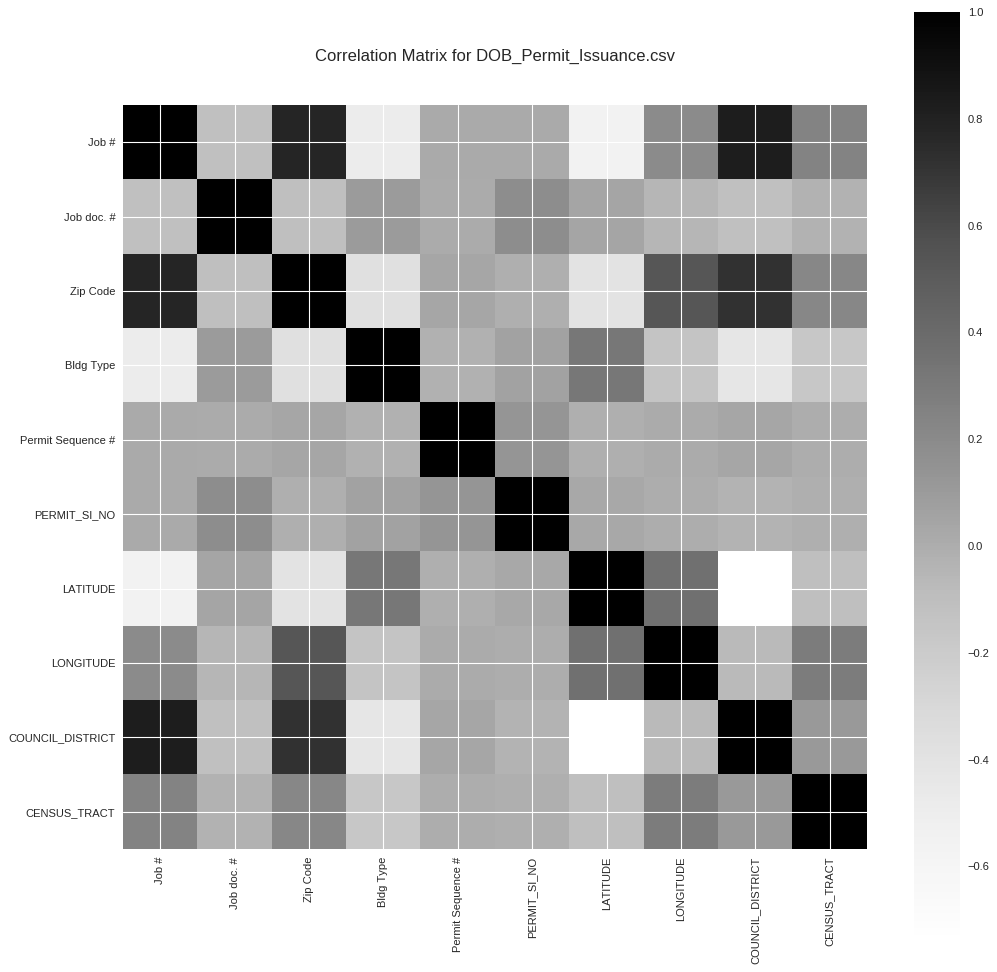

In [12]:
plotCorrelationMatrix(dataset, 15)

We can see that there is strong positive relationship between  :

* Zip Code and Job #
* Job  # and Council_District
* Zip Code and Council_District


---


To get more insight of the data and its column-wise data distribution, I will plot the columns using bar graphs. For displaying purposes, I will pick columns that have between 1 and 50 unique values.

In [0]:
def plotColumns(dataframe, nGraphShown, nGraphPerRow):
    nunique = dataframe.nunique()
    dataframe = dataframe[[col for col in dataframe if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = dataframe.shape
    columnNames = list(dataframe)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columndataframe = dataframe.iloc[:, i]
        if (not np.issubdtype(type(columndataframe.iloc[0]), np.number)):
            valueCounts = columndataframe.value_counts()
            valueCounts.plot.bar()
        else:
            columndataframe.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

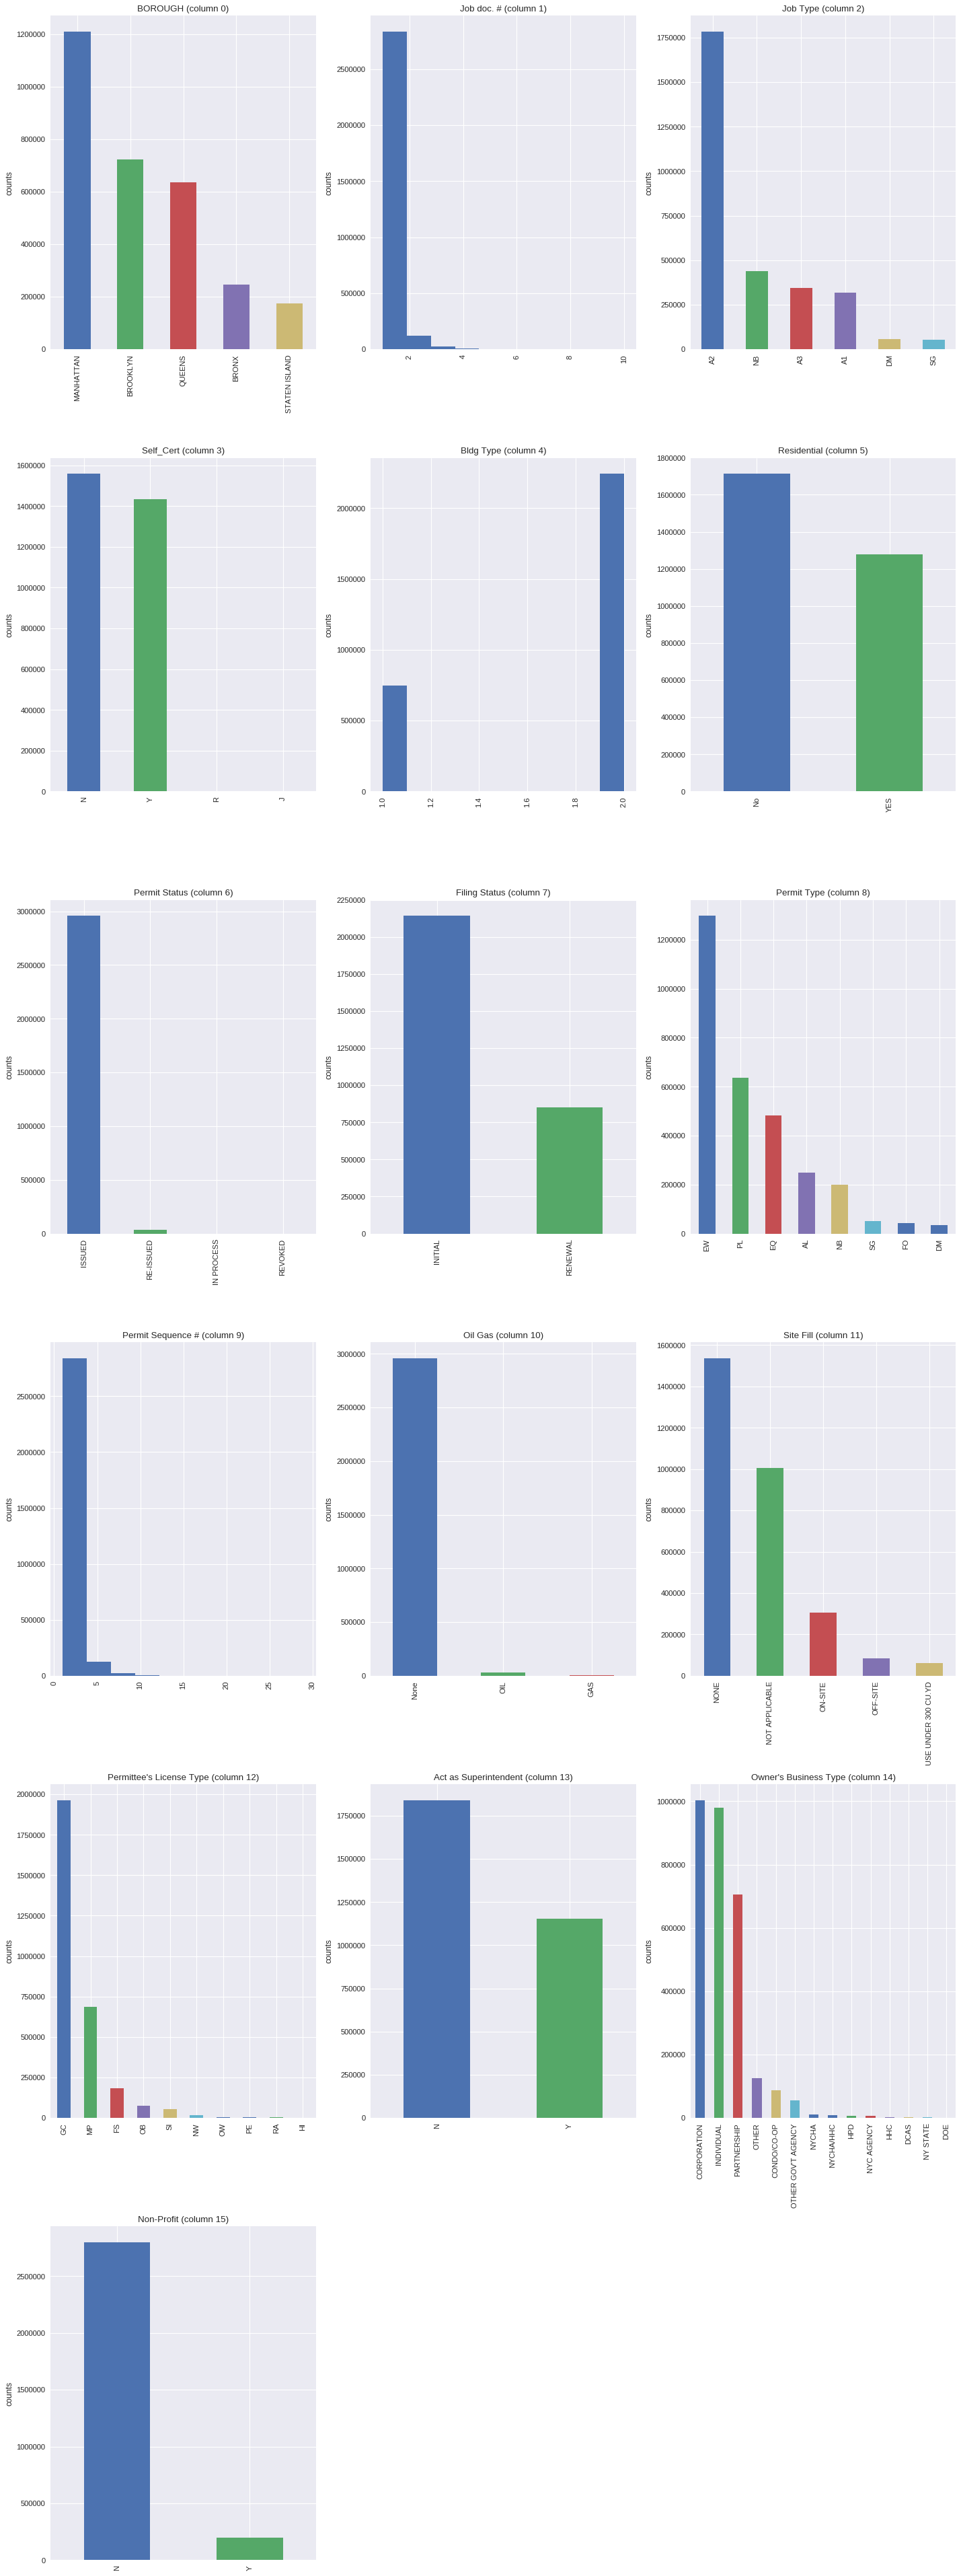

In [9]:
plotColumns(dataset, 38, 3)

From the Borough graph, it's evident that the Manhattan has highest number of filing for the permit. Then the second popuar borough after manhattan is Brooklyn with huge margin. Then comes the Queens with almost same number of permits as Brooklyn. We see another plunge in permit numbers with Bronx and Staten Island.

---

Job Document number is the number of documents that were added with the file during the application. Mostly all the filings required a single document. There are some permits that had two documents and then higher number of documents are negligible.

---

There is a pattern in Job Type as well. We can see that the most populat Job Type or Work Type is A2 with more than 1.75 M permits. The second most popular work type is NB (new building) with around 400,000 permits. The number of permits decreases with A3, A1, DM and SG where DM and SG are significantly less than other types.

---

Self_Cert	indicates whether or not the application was submitted as Professionally Certified. A Professional Engineer (PE) or Registered Architect (RA) can certify compliance with applicable laws and codes on applications filed by him/her as applicant. Plot shows mostly were not filed by Professional Engineer or Registered Architect. 

---

Bldg Type indicates	legal occupancy classification. The most popular type of building type is '2' with more than 2M permits.

---

Most of the buildings are non Residential and only about 1.3M buildinngs were residential.

---

Permit Status	indicates the current status of the permit application. Corresponding plot for the column suggests that most of the permits are 'Issued' and very small number were 'Reissued'. The 'In-Progress' and 'Revoked' are negligible. 

---
Filing Status	indicates if this is the first time the permit is being applied for or if the permit is being renewed. A large amount of permits were in 'Initial' status and less than half of that were in 'Renewal' state.

---

Permit Type	The specific type of work covered by the permit.	This is a two character code to indicate the type of work. There are 7 types of permits where EW has the highest number. The number indicates decreasing trend with PL, EQ, AL, NB, SG, and FO. 

---

A sequential number assigned to each issuance of the particular permit from initial issuance to each subsequent renewal. Every initial permit should have a 01 sequence number. Every additional renewal receives a number that increases by 1 (ex: 02, 03, 04). Most of the permits have less than 5 sequence number.

---

If the permit is for work on fuel burning equipment, this indicates whether it burns oil or gas. Most of the permits are for neither Oil nor Gas. A very small fraction of permits is for Oil and there is negligible number of permits for Gas.

---

Site Fill indicates the source of any fill dirt that will be used on the construction site. When over 300 cubic yards of fill is being used, the Department is required to inform Sanitation of where the fill is coming from and the amount. About 1.1M entries didn't mention any Site Fill type indicating that the less than 300 cubic yards of fill is being used. Almost permits are not applicable. About 300,000 permits were for on-site fill and less than 100,000 were for off-site.


---
Professional license type of the person that the permit was issued to. In most of the cases the person was holding GC type. Then the number showcased a decreasing trend with MP, FS, OB, SI, NW, OW, PE, RA, and HI where  NW, OW, PE, RA, and HI are negligible in number.

---

Act as Superintendent indicates if the permittee acts as the Construction Superintendent for the work site. Only about 1.1M people responded 'Yes' to this and majority respondded with 'No'


---

Owner's Business Type	indicates the type of entity that owns the building where the work will be performed. Mostly the entities owning the builing were 'Corporations'. With slightly less than 'Corporation', 'Individual' type stands at the second position and 'Partnership' holds the third position. Other business types like  are less significant in number.



---

Non-Profit indicates if the building is owned by a non-profit. Less than 250,000 buildings were owned by 'Non-Profit' and more than 2.75M were not 'Non-Profit'.






# Borough-wise analysis
Let's now dive deeper in the data and take a closer look. Is the trend we see above is same across all Boroughs ?. Does every borough have same type of building? Is 'EW' the most popular permit type across all cities? What about the 'owner's business type' and 'Job Type' ? I will try to find the answers to all these by exploring the pattern in each bouough.

### Bldg Type in each borough

In [0]:
manhattan_bldg_type = dataset[dataset.BOROUGH == 'MANHATTAN'][['Bldg Type']]
manhattan_bldg_type.reset_index(drop=True, inplace=True)

brooklyn_bldg_type = dataset[dataset.BOROUGH == 'BROOKLYN'][['Bldg Type']]
brooklyn_bldg_type.reset_index(drop=True, inplace=True)

bronx_bldg_type = dataset[dataset.BOROUGH == 'BRONX'][['Bldg Type']]
bronx_bldg_type.reset_index(drop=True, inplace=True)

queens_bldg_type = dataset[dataset.BOROUGH == 'QUEENS'][['Bldg Type']]
queens_bldg_type.reset_index(drop=True, inplace=True)

staten_island_bldg_type = dataset[dataset.BOROUGH == 'STATEN ISLAND'][['Bldg Type']]
staten_island_bldg_type.reset_index(drop=True, inplace=True)

building_type = pd.DataFrame()
building_type['manhattan_bldg_type'] = manhattan_bldg_type #brooklyn_bldg_type
building_type['brooklyn_bldg_type'] = brooklyn_bldg_type 
building_type['bronx_bldg_type'] = bronx_bldg_type 
building_type['queens_bldg_type'] = queens_bldg_type 
building_type['staten_island_bldg_type'] = staten_island_bldg_type 

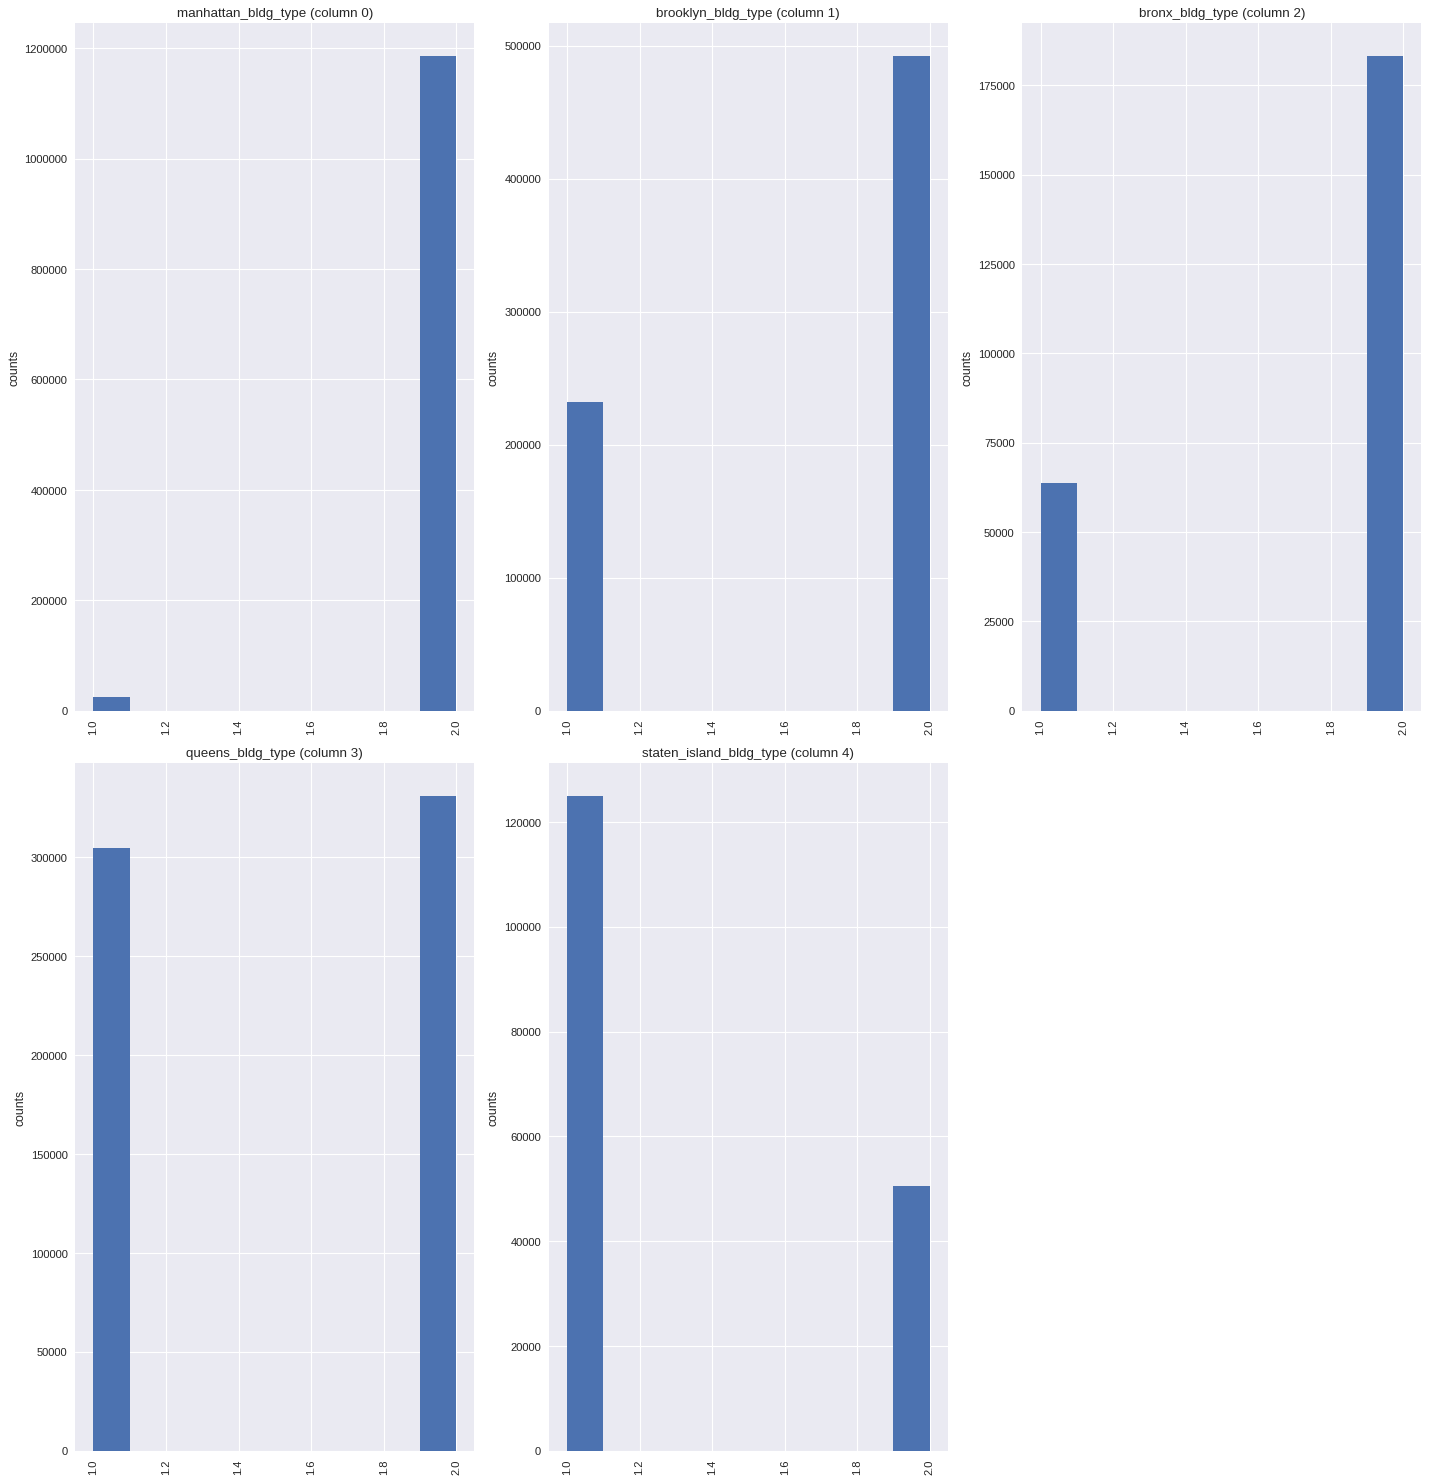

In [18]:
plotColumns(building_type, 5, 3)

**Analysis**

The builing type is either '1' or '2' and we earlier discovered that type '2' were significantly popular as compared to type '1'. However, this is not true for all the Boroughs. For manhattan, this trend still holds true. But for other locations, the type '1' buildings are comparable in number with that of type '2'. More interestingly, in case of Staten Island, the type '1' is significantly popular beating type '2' with a good margin. 

### Permit Type in Each Borough

In [0]:
manhattan_permit_type = dataset[dataset.BOROUGH == 'MANHATTAN'][['Permit Type']]
manhattan_permit_type.reset_index(drop=True, inplace=True)

brooklyn_permit_type = dataset[dataset.BOROUGH == 'BROOKLYN'][['Permit Type']]
brooklyn_permit_type.reset_index(drop=True, inplace=True)

bronx_permit_type = dataset[dataset.BOROUGH == 'BRONX'][['Permit Type']]
bronx_permit_type.reset_index(drop=True, inplace=True)

queens_permit_type = dataset[dataset.BOROUGH == 'QUEENS'][['Permit Type']]
queens_permit_type.reset_index(drop=True, inplace=True)

staten_island_permit_type = dataset[dataset.BOROUGH == 'STATEN ISLAND'][['Permit Type']]
staten_island_permit_type.reset_index(drop=True, inplace=True)

permit_type = pd.DataFrame()
permit_type['manhattan_permit_type'] = manhattan_permit_type #brooklyn_permit_type
permit_type['brooklyn_permit_type'] = brooklyn_permit_type 
permit_type['bronx_permit_type'] = bronx_permit_type 
permit_type['queens_permit_type'] = queens_permit_type 
permit_type['staten_island_permit_type'] = staten_island_permit_type 

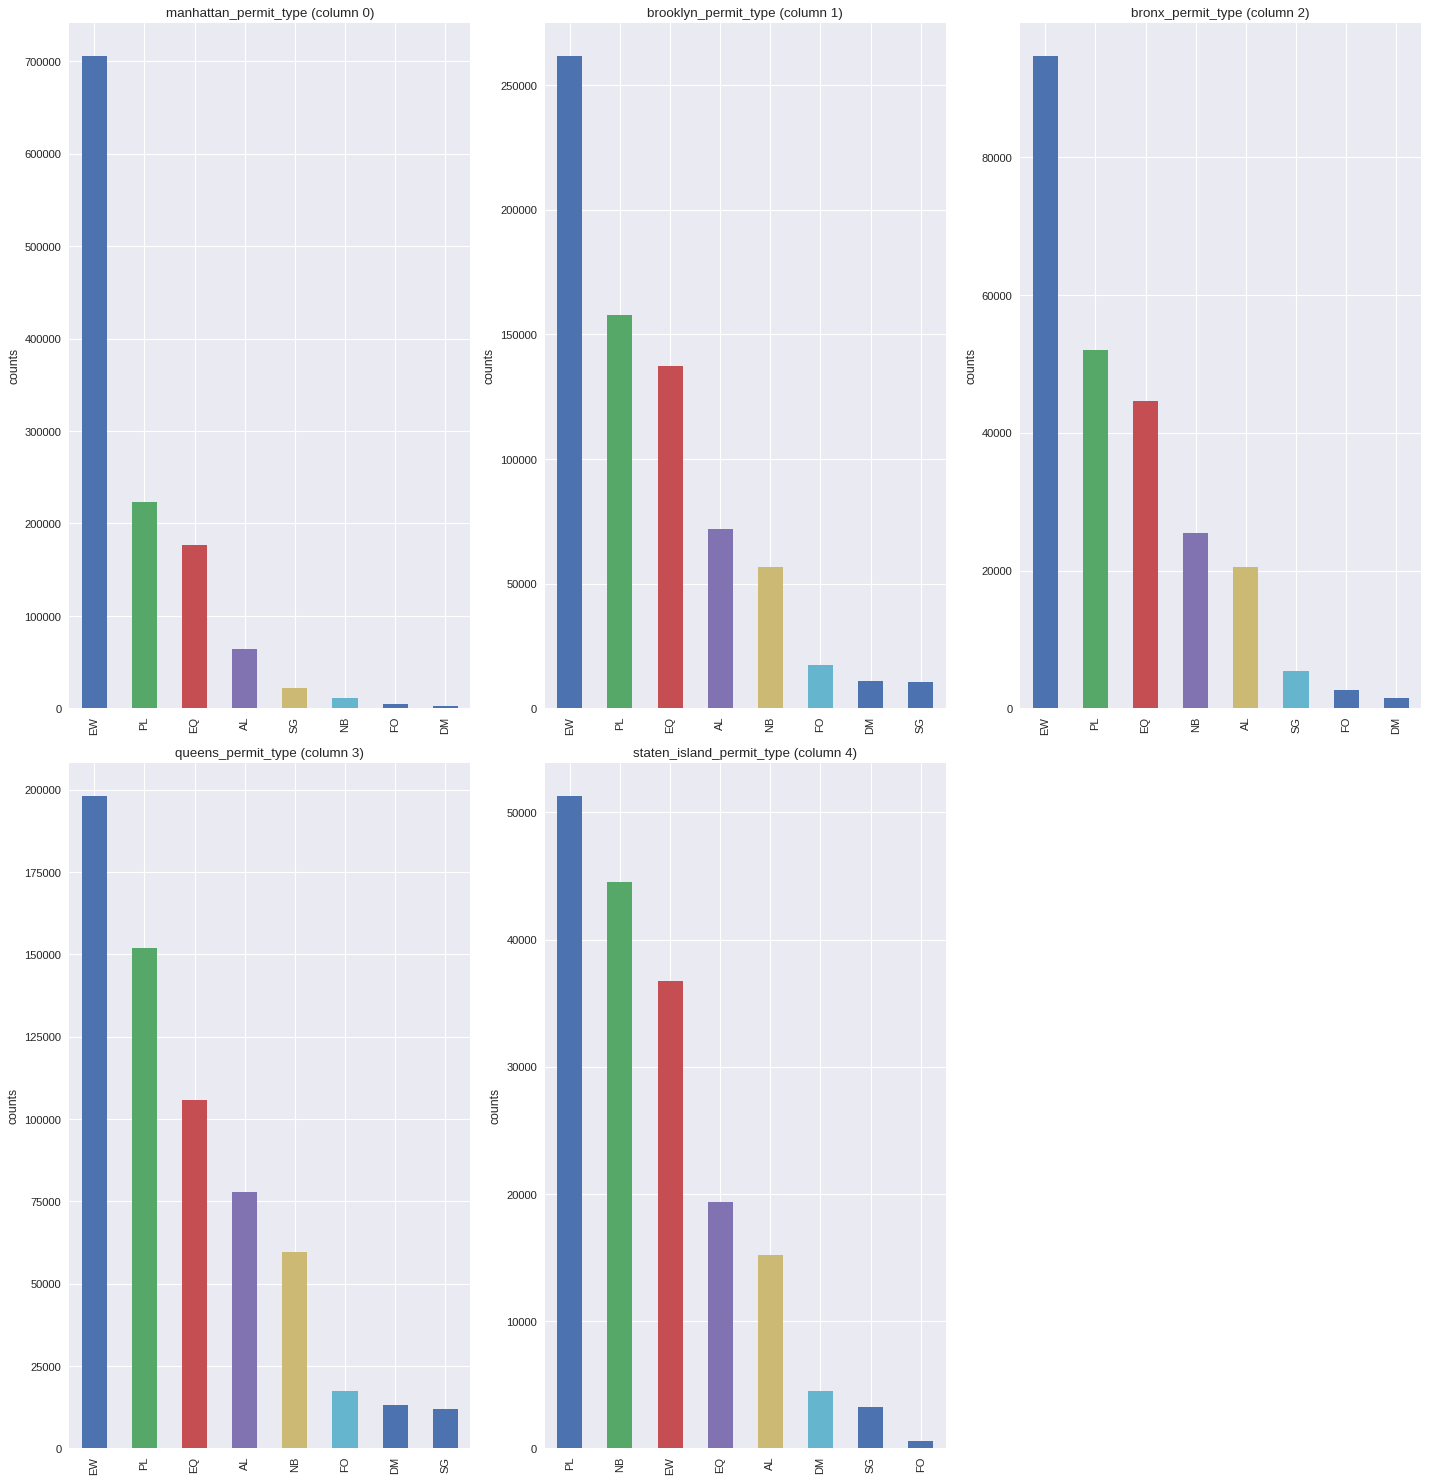

In [19]:
plotColumns(permit_type, 5, 3)

**Analysis**

In Permit Type we earlier discovered that type 'EW' was the most popular and significantly higher in number as compared to other types. However, this is true for most of the Boroughs except Staten Island. However, other types of Permit are shuffled in each Borough. Below is the type of permits in decreasing order for each borough.

Manhattan | Brooklyn | Queens |Bronx | Staten Island 
------------|--------|--------------|-------------
EW | EW | EW| EW | PL 
PL | PL | PL | PL |NB 
EQ | EQ | EQ |EQ |EW 
AL | AL | NB | AL | EQ
SQ | NB | AL | SQ | AL
NB| FO| SG |FO | DM
FO|DM|FO| DM| SG
DM|SG|DM|SG|FO

### Owner's Business Type in Each Borough

In [0]:
manhattan_owners_business_type = dataset[dataset.BOROUGH == 'MANHATTAN'][['Owner\'s Business Type']]
manhattan_owners_business_type.reset_index(drop=True, inplace=True)

brooklyn_owners_business_type = dataset[dataset.BOROUGH == 'BROOKLYN'][['Owner\'s Business Type']]
brooklyn_owners_business_type.reset_index(drop=True, inplace=True)

bronx_owners_business_type = dataset[dataset.BOROUGH == 'BRONX'][['Owner\'s Business Type']]
bronx_owners_business_type.reset_index(drop=True, inplace=True)

queens_owners_business_type = dataset[dataset.BOROUGH == 'QUEENS'][['Owner\'s Business Type']]
queens_owners_business_type.reset_index(drop=True, inplace=True)

staten_island_owners_business_type = dataset[dataset.BOROUGH == 'STATEN ISLAND'][['Owner\'s Business Type']]
staten_island_owners_business_type.reset_index(drop=True, inplace=True)

owners_business_type = pd.DataFrame()
owners_business_type['manhattan_owners_business_type'] = manhattan_owners_business_type #brooklyn_owners_business_type
owners_business_type['brooklyn_owners_business_type'] = brooklyn_owners_business_type 
owners_business_type['bronx_owners_business_type'] = bronx_owners_business_type 
owners_business_type['queens_owners_business_type'] = queens_owners_business_type 
owners_business_type['staten_island_owners_business_type'] = staten_island_owners_business_type 

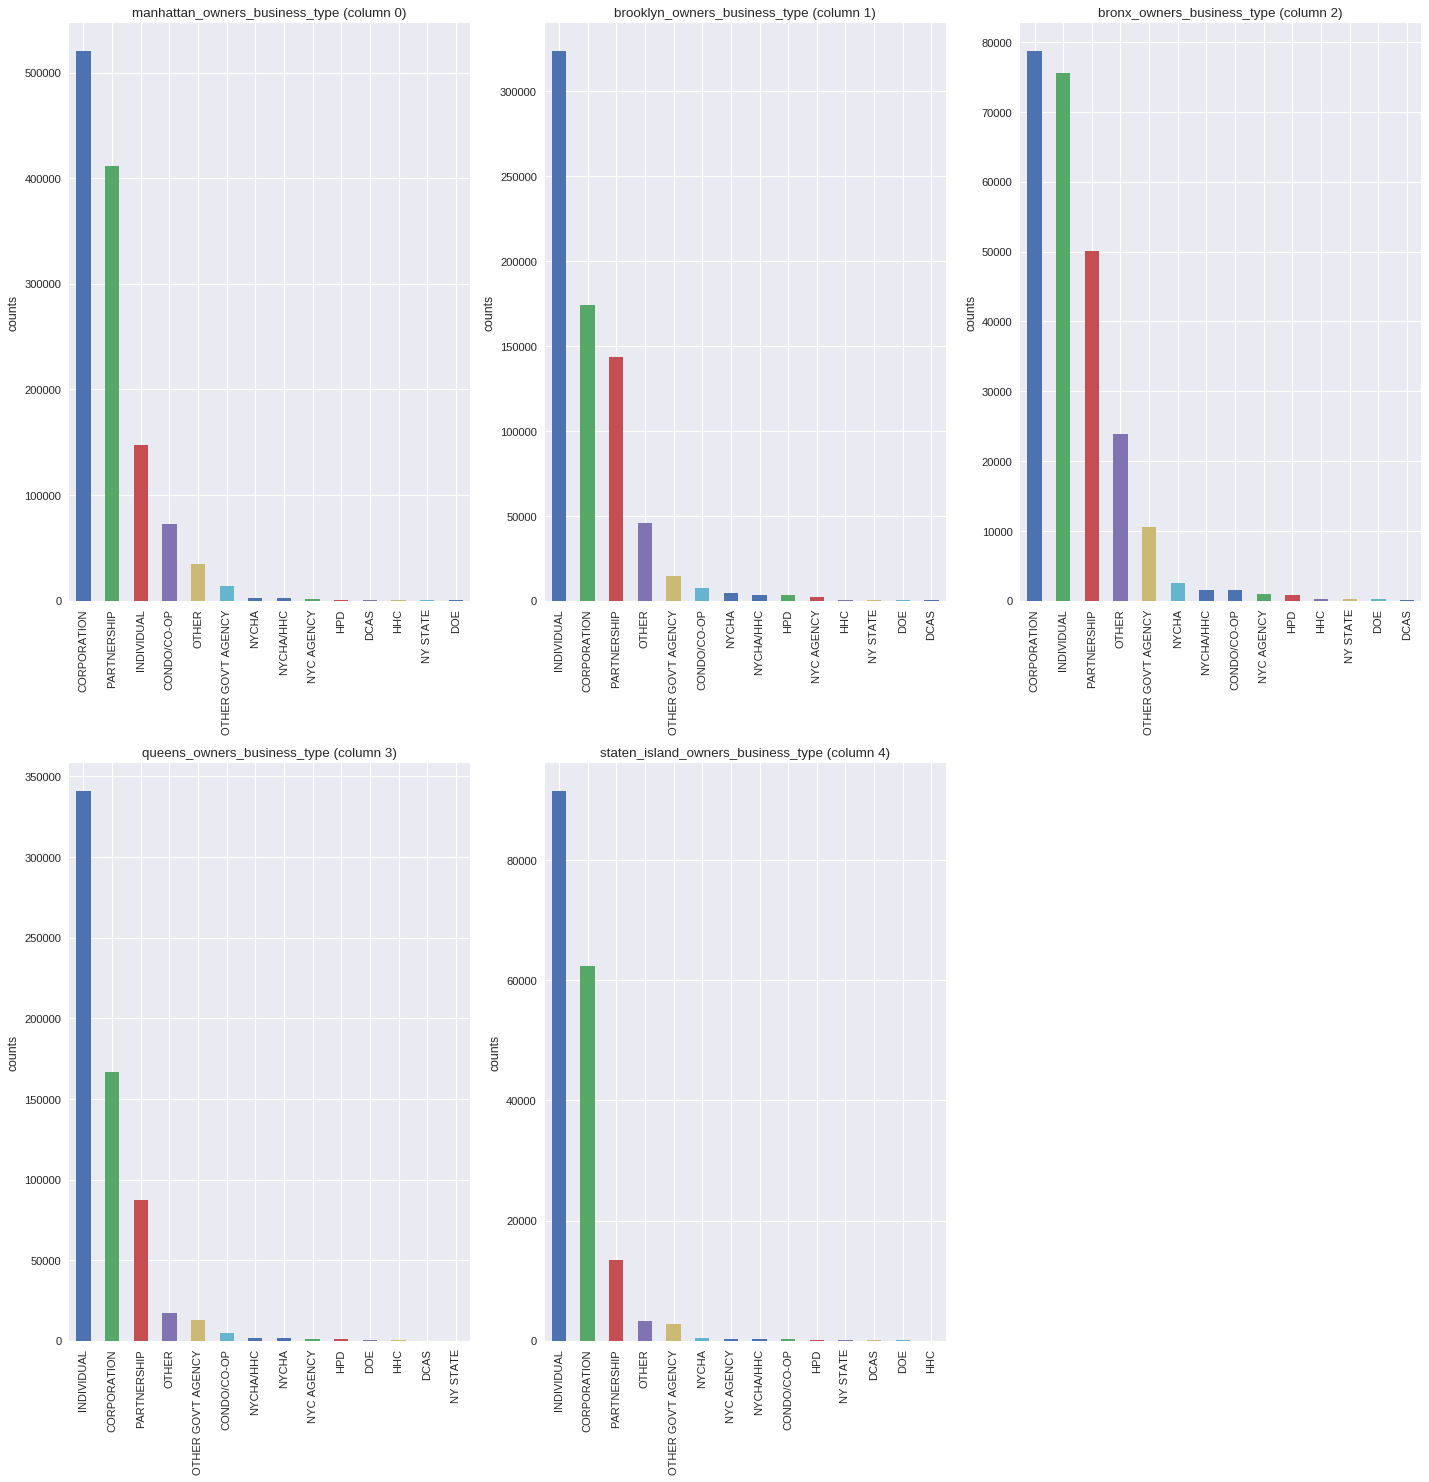

In [21]:
plotColumns(owners_business_type, 5, 3)

**Analysis**

We earlier discovered that the 'Corporation' was the most popular 'Owner's Business type' and 'Individual' type was closely competing with it. Taking a closer look at each borough reveals that the trend highly varies in all the Boroughs. In Manhattan, the 'Corporation' is still the highest but the 'Individual' is substituted by 'Partnership'. In Brooklyn, 'Individual' holds the top place and 'Corporation' and 'Partnership' are on second and third place respectively.

In Bronx, the 'Corporation' and  'Individual' are closely competing while 'Corporation' holds the highest number and 'Partnership' is on third place.

For Queens and Staten Island, the  'Individual' holds the top place and 'Corporation' and 'Partnership' are on second and third place respectively. This is consistent with the trend observed in 'Brooklyn'.

### Job Type in Each Borough

In [0]:
manhattan_job_type = dataset[dataset.BOROUGH == 'MANHATTAN'][['Job Type']]
manhattan_job_type.reset_index(drop=True, inplace=True)

brooklyn_job_type = dataset[dataset.BOROUGH == 'BROOKLYN'][['Job Type']]
brooklyn_job_type.reset_index(drop=True, inplace=True)

bronx_job_type = dataset[dataset.BOROUGH == 'BRONX'][['Job Type']]
bronx_job_type.reset_index(drop=True, inplace=True)

queens_job_type = dataset[dataset.BOROUGH == 'QUEENS'][['Job Type']]
queens_job_type.reset_index(drop=True, inplace=True)

staten_island_job_type = dataset[dataset.BOROUGH == 'STATEN ISLAND'][['Job Type']]
staten_island_job_type.reset_index(drop=True, inplace=True)

job_type = pd.DataFrame()
job_type['manhattan_job_type'] = manhattan_job_type #brooklyn_job_type
job_type['brooklyn_job_type'] = brooklyn_job_type 
job_type['bronx_job_type'] = bronx_job_type 
job_type['queens_job_type'] = queens_job_type 
job_type['staten_island_job_type'] = staten_island_job_type 

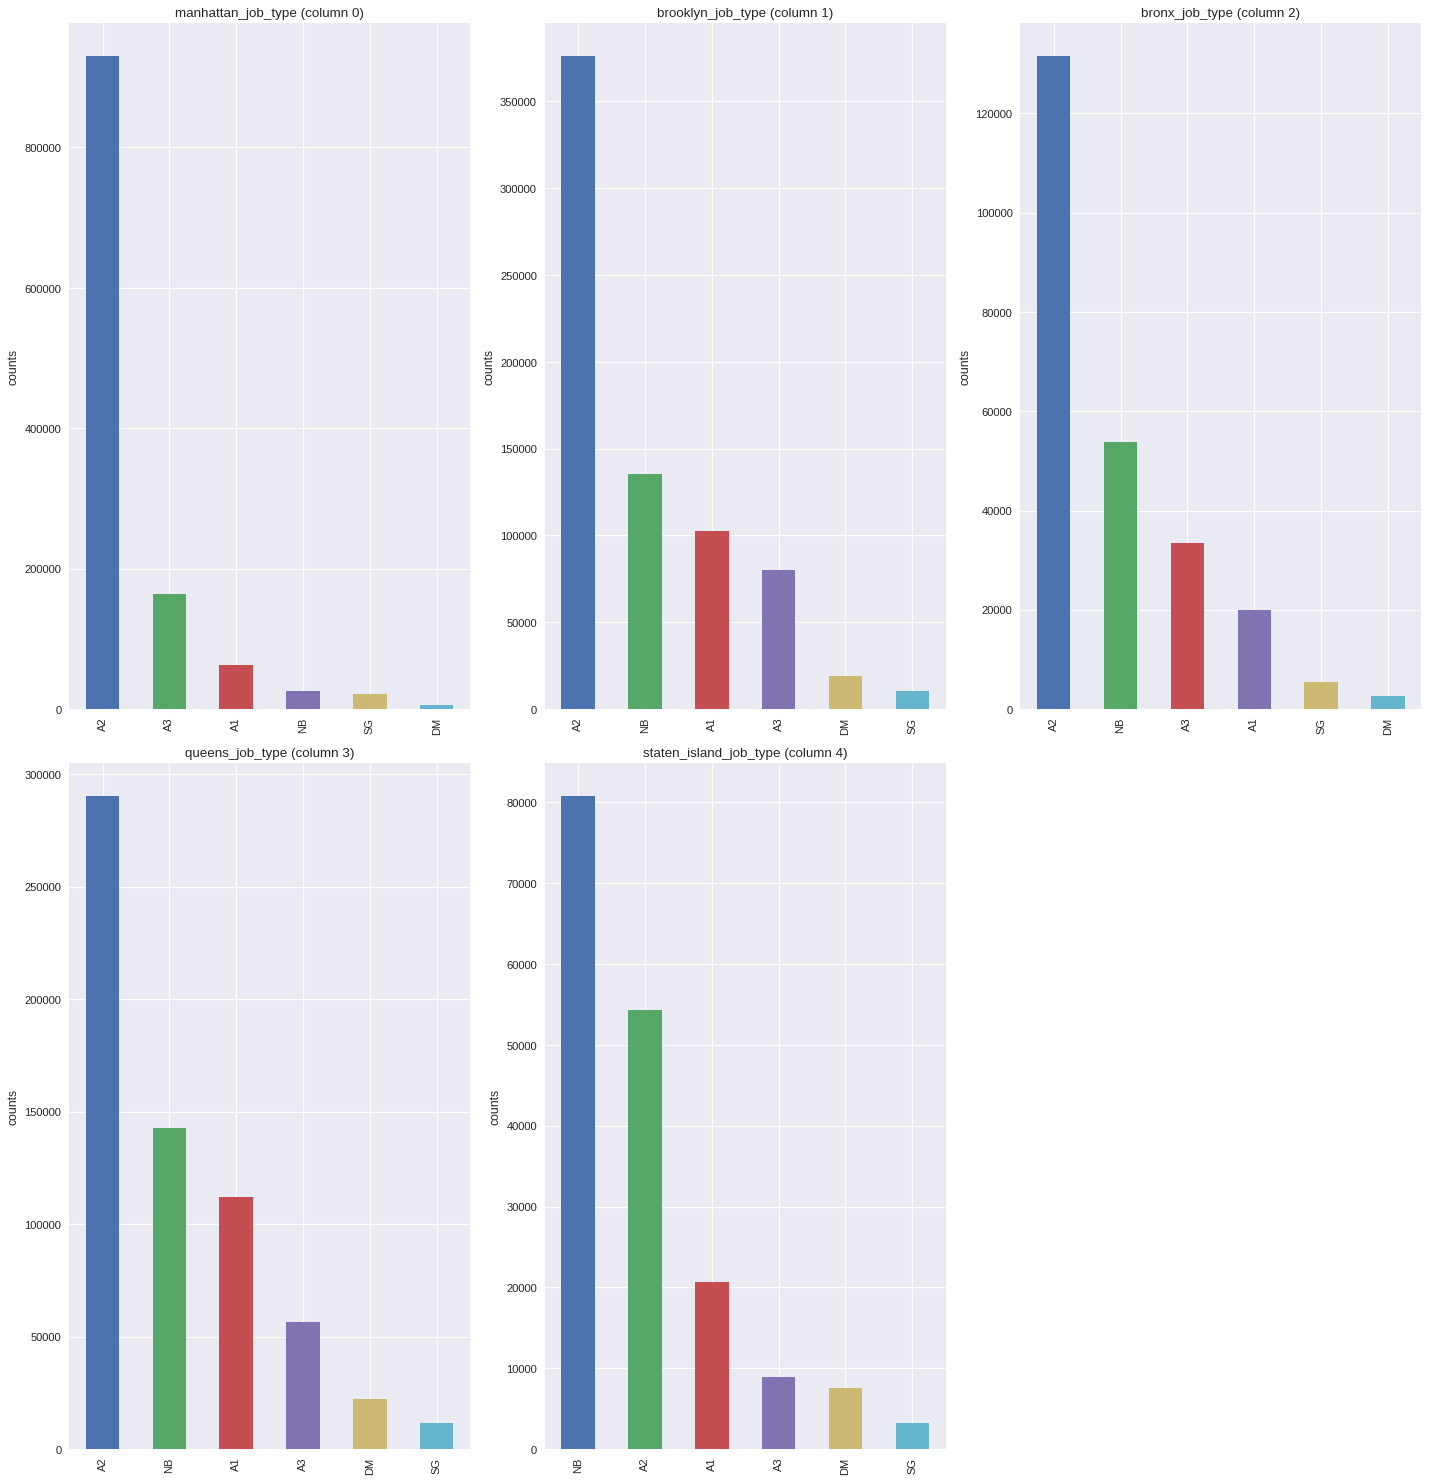

In [23]:
plotColumns(job_type, 5, 3)

**Analysis**

We earlier discovered that the 'A2' was the most popular 'Job type' and numbers showed a decreasing trend with 'NB', 'A3', 'A1', 'DM', and 'SG'. Taking a closer look at each borough revealsa slightly different trend. For example, in Manhattan, the 'A2' is still the highest but the 'NB' is pushed beyond 'A1' to the fourth place while in Staten Island 'NB' holds the first place. Below is the type of Jobs in decreasing order for each borough. 

Overall | Manhattan | Brooklyn | Queens |Bronx | Staten Island 
------------|--------|--------------|-------------
A2|A2|A2|A2|A2|NB
NB|A3|NB|NB|NB|A2
A3|A1|A1|A3|A1|A1
A1|NB|A3|A1|A3|A3
DM|SG|DM|SG|DM|DM
SG|DM|SG|DM|SG|SG

# Permits Per Years

### Is there is trend in the number of permits issued each year? Let's find out!

First, the date format of 'Issuance Date' needs to be converted to python Datetime format and then only the year needs to be extracted from the date.

In [0]:
dataset['Issuance Date'] = pd.to_datetime(dataset['Issuance Date'])
dataset['Issuance Date'] =dataset['Issuance Date'].dt.year

Once the dates are replaced by the corresponding years, we can plot the graph.

In [0]:
timeline = dataset['Issuance Date'].value_counts(ascending=True)
timeline = timeline.sort_index()

In [19]:
timeline.to_frame()

,Issuance Date
1989,596
1990,4552
1991,9001
1992,12818
1993,19253
1994,21048
1995,19993
1996,21193
1997,46568
1998,68201


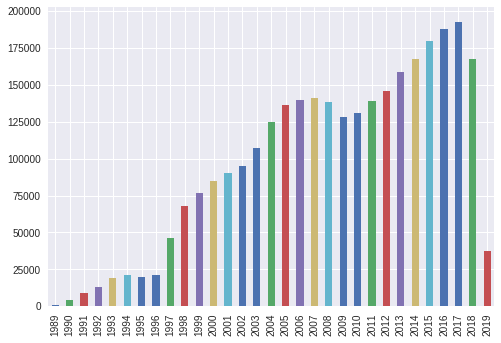

In [21]:
timeline.plot.bar()

**Analysis**

We can observe that the number of permits has been consistently increasing each year. The number got stagnant from 1993 to 1996 and then it increased exponentially from 1997 until 2007. The applications decreasedfor a couple of years and then rose exponentially from 2010 to 2017.

### Borough-Wise Analysis of Timeline

Whether the trend is consistent across all borough? Is there a time when construction slowed down in a city and surged in other ?

In [0]:
manhattan_permits_issued = dataset[dataset.BOROUGH == 'MANHATTAN'][['Issuance Date']]
manhattan_permits_issued.reset_index(drop=True, inplace=True)

brooklyn_permits_issued = dataset[dataset.BOROUGH == 'BROOKLYN'][['Issuance Date']]
brooklyn_permits_issued.reset_index(drop=True, inplace=True)

bronx_permits_issued = dataset[dataset.BOROUGH == 'BRONX'][['Issuance Date']]
bronx_permits_issued.reset_index(drop=True, inplace=True)

queens_permits_issued = dataset[dataset.BOROUGH == 'QUEENS'][['Issuance Date']]
queens_permits_issued.reset_index(drop=True, inplace=True)

staten_island_permits_issued = dataset[dataset.BOROUGH == 'STATEN ISLAND'][['Issuance Date']]
staten_island_permits_issued.reset_index(drop=True, inplace=True)

permits_issued = pd.DataFrame()
permits_issued['manhattan_permits_issued'] = manhattan_permits_issued #brooklyn_permits_issued
permits_issued['brooklyn_permits_issued'] = brooklyn_permits_issued 
permits_issued['bronx_permits_issued'] = bronx_permits_issued 
permits_issued['queens_permits_issued'] = queens_permits_issued 
permits_issued['staten_island_permits_issued'] = staten_island_permits_issued 

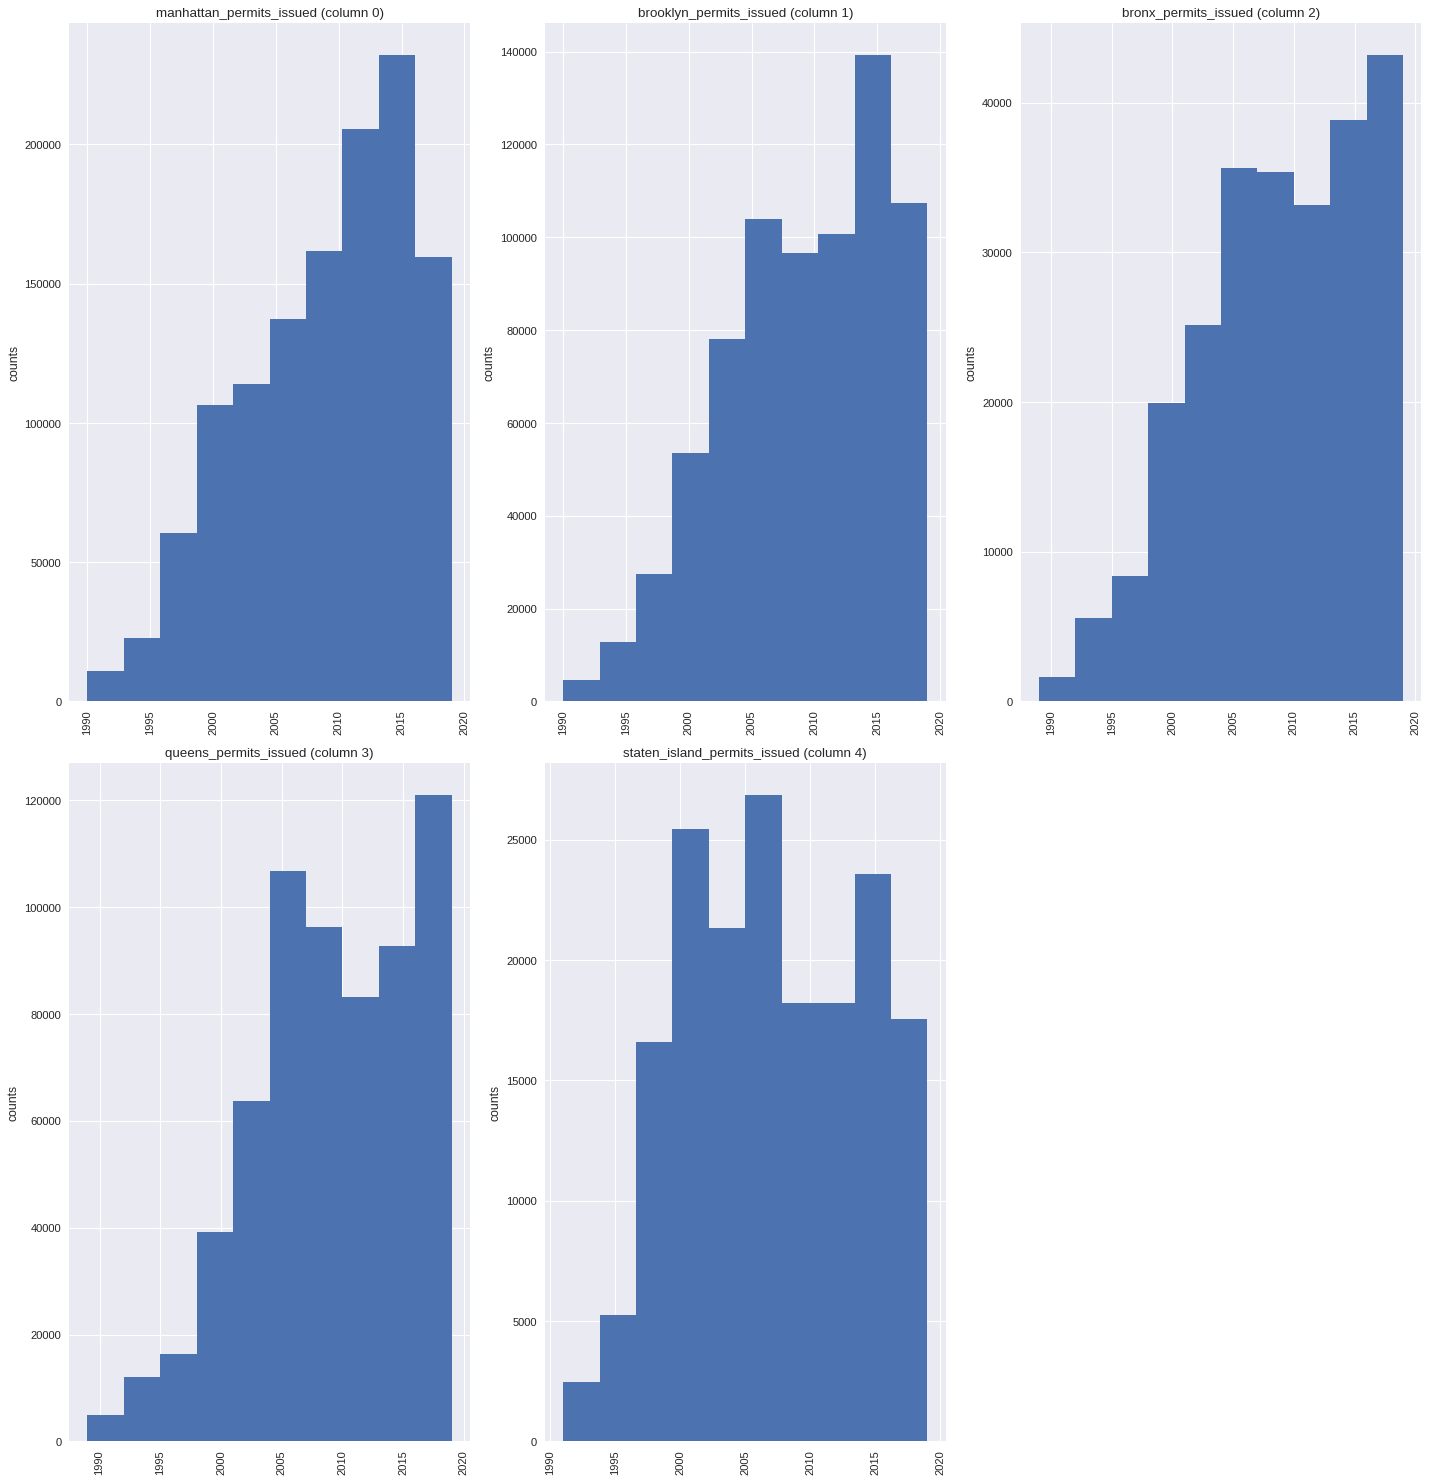

In [23]:
plotColumns(permits_issued, 5, 3)

In Manhattan and Brooklyn, most number of applications were filed during 2010 and 2015 period.

Bronx and Queens observed the highest number of filings in recent years from 2015 to 2019. 

Staten Island had most applications during 2000 to 2015 and then there is again a surge in applications around 2015 but the number of applications is very less compared to its counterparts.

# Permits per month

### Is there is trend in the number of permits filed every month? Let's explore!

First, the date format of 'Filing Date' needs to be converted to python Datetime format and then only the month needs to be extracted from the date.

In [0]:
dataset['Filing Date'] = pd.to_datetime(dataset['Filing Date'])
dataset['Filing Date'] =dataset['Filing Date'].dt.month

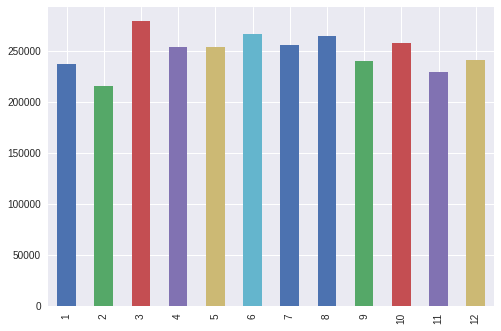

In [29]:
months = dataset['Filing Date'].value_counts()
months.to_frame()
months = months.sort_index()
plotColumns(months, 1, 1)

Mostly all the months gets equal number of permit applications. February has less days, so that justifies the less number. 

Overall, Month of 'March' has highest permit filings.  